In [21]:
#try using standard scalar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from scipy import stats
%matplotlib inline

In [22]:
df=pd.read_csv('cleaned_data.csv')
df.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,2.0,0.0,7.0,0
1,1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,7.0,0
2,2,29,1,2,140.0,251.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,7.0,0
3,3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,2.0,0.0,6.0,0
4,4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0,7.0,0


In [23]:
#drop unnamed column...not needed.
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,2.0,0.0,7.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,7.0,0
2,29,1,2,140.0,251.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,7.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,2.0,0.0,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0,7.0,0


In [24]:
df.index.name='id'
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,2.0,0.0,7.0,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,7.0,0
2,29,1,2,140.0,251.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,7.0,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,2.0,0.0,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,2.0,0.0,7.0,0


In [25]:
df['ca'].isnull().any()

False

In [26]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [27]:
# Let's define our X and y for our dataset
X=np.asarray(df[['cp','exang','oldpeak','sex']])
X[0:5]

array([[2., 0., 0., 1.],
       [2., 0., 0., 1.],
       [2., 0., 0., 1.],
       [1., 0., 0., 0.],
       [2., 0., 0., 0.]])

In [28]:
y=np.asarray(df['num'])
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [29]:
df.shape

(294, 14)

In [30]:
#Also, we normalize the dataset:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit_transform(X)
x[0:5]

array([[-1.02025916, -0.65889782, -0.64607386,  0.61666984],
       [-1.02025916, -0.65889782, -0.64607386,  0.61666984],
       [-1.02025916, -0.65889782, -0.64607386,  0.61666984],
       [-2.05816986, -0.65889782, -0.64607386, -1.62161328],
       [-1.02025916, -0.65889782, -0.64607386, -1.62161328]])

In [32]:
#Train/Test dataset
#Okay, we split our dataset into train and test set
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (235, 4) (235,)
Test set: (59, 4) (59,)


In [33]:
#Modeling (Logistic Regression with Scikit-learn);
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
#Now we can predict using our test set:
yhat = LR.predict(x_test)
yhat

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
#Evaluation;
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.8813559322033898

In [36]:
#confusion matrix
#Another way of looking at accuracy of classifier is to look at confusion matrix.
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[16  3]
 [ 4 36]]


Confusion matrix, without normalization
[[16  3]
 [ 4 36]]


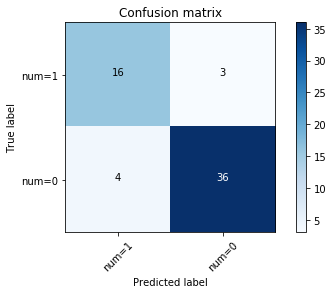

In [37]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['num=1','num=0'],normalize= False,  title='Confusion matrix')

In [38]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        40
           1       0.80      0.84      0.82        19

   micro avg       0.88      0.88      0.88        59
   macro avg       0.86      0.87      0.87        59
weighted avg       0.88      0.88      0.88        59

